In [2]:
import os
import sys

import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt

PROJ_ROOT =  os.path.join(os.pardir)

print(os.path.abspath(PROJ_ROOT))

d:\DANIELA\Projects\WIDS\covid-outcomes-research


In [2]:
#Let your audience know when this notebook was run, and with which packages. Useful when you are not sharing the notebook as
#executable code.

%pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext watermark

In [4]:
%watermark -a "Daniela Alvarez Zegarra" -d -t -v -p numpy,pandas

Author: Daniela Alvarez Zegarra

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.3.0

numpy : 1.21.5
pandas: 1.4.2



In [5]:
#Documentation to know what other info can i get with watermark

%watermark?

Docstring:
::

  %watermark [-a AUTHOR] [-gu GITHUB_USERNAME] [-e EMAIL] [-ws WEBSITE]
                 [-d] [-n] [-t] [-i] [-z] [-u] [-c CUSTOM_TIME] [-v]
                 [-p PACKAGES] [-co] [-h] [-m] [-g] [-r] [-b] [-w] [-iv]

IPython magic function to print date/time stamps
and various system information.

optional arguments:
  -a AUTHOR, --author AUTHOR
                        prints author name
  -gu GITHUB_USERNAME, --github_username GITHUB_USERNAME
                        prints author github username
  -e EMAIL, --email EMAIL
                        prints author email
  -ws WEBSITE, --website WEBSITE
                        prints author or project website
  -d, --date            prints current date as YYYY-mm-dd
  -n, --datename        prints date with abbrv. day and month names
  -t, --time            prints current time as HH-MM-SS
  -i, --iso8601         prints the combined date and time including the time
                        zone in the ISO 8601 standard with UTC off

In [6]:
#Let's print our requirements

print(open(os.path.join(PROJ_ROOT,'requirements.txt')).read())

# local package
-e .

# external requirements
click
Sphinx
coverage
awscli
flake8
python-dotenv>=0.5.1
jupyter
ipython
numpy
pandas
matplotlib
scikit-learn
scipy
pytest
nbdime
runipy
seaborn



## Loading the Data

In [4]:
merged_data_path = os.path.join(PROJ_ROOT,
                          "data",
                          "interim",
                          "merged_dataframe.csv")


In [5]:
df = pd.read_csv(merged_data_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 72 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Unnamed: 0                                                                     3140 non-null   int64  
 1   fips                                                                           3140 non-null   int64  
 2   TOT_POP                                                                        3140 non-null   int64  
 3   0-9                                                                            3140 non-null   int64  
 4   10-19                                                                          3140 non-null   int64  
 5   20-29                                                                          3140 non-null   int64  
 6   30-39                   

In [7]:
#Drop unnamed column

df.drop('Unnamed: 0', axis=1, inplace=True)

# Milestone I: Exploratory data analysis

**Looking for correlations**

In [8]:
num_cols = df.select_dtypes(['int', 'float']).columns

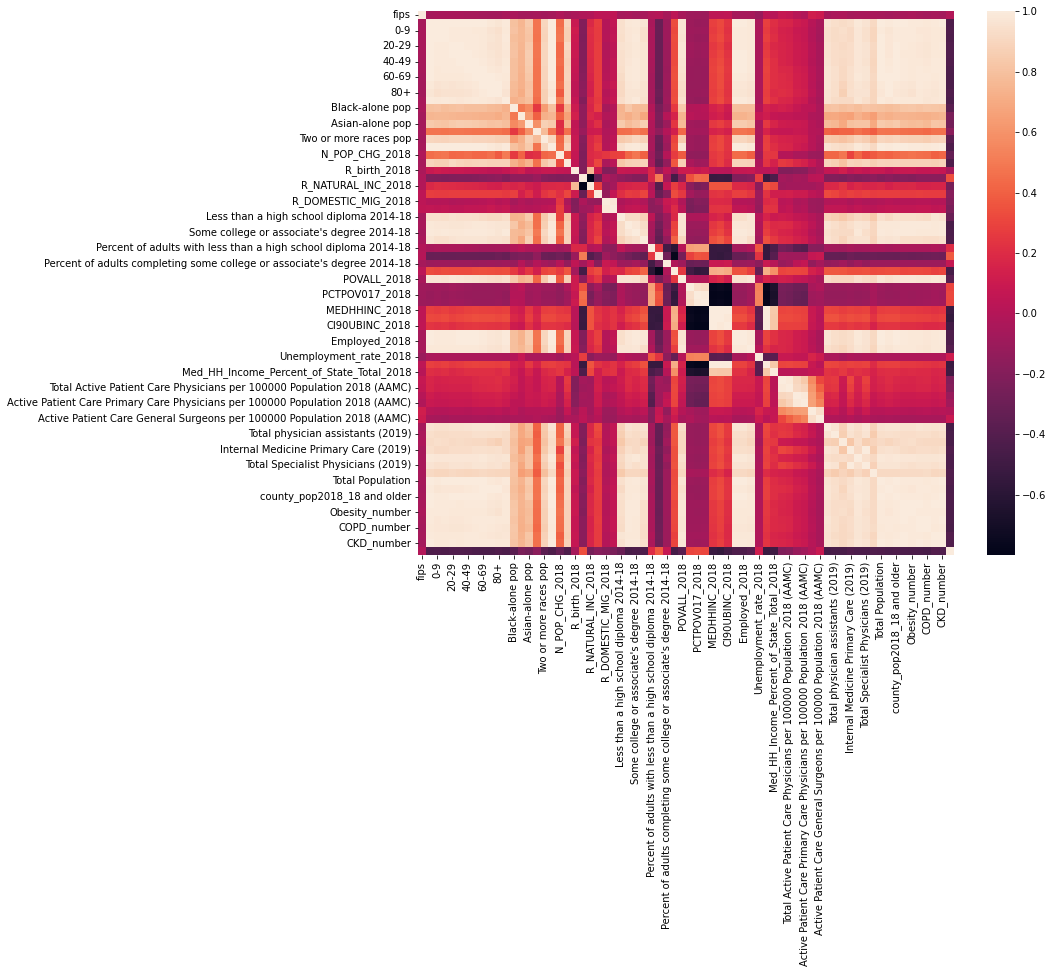

In [9]:
fig = plt.figure(figsize=(12,10))
cor_matrix = pd.concat([df[num_cols]], axis = 1).corr()
sns.heatmap(cor_matrix)
plt.show()

**Looking for outliers**

In [8]:
df.describe()

,fips,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,...,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,...,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,...,1.022266e+05,2.132298e+04,8.081460e+04,3.338540e+04,2.527613e+04,5597.593312,5827.242357,9326.577707,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,...,3.283878e+05,6.140588e+04,2.585190e+05,9.888669e+04,7.446684e+04,15615.285499,15720.551934,29754.601185,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,...,7.400000e+01,2.700000e+01,8.800000e+01,4.100000e+01,2.500000e+01,7.000000,7.000000,11.000000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,...,1.096700e+04,2.814750e+03,8.460250e+03,4.215000e+03,3.075000e+03,798.500000,815.000000,1187.750000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,...,2.570400e+04,6.310000e+03,2.023000e+04,9.753000e+03,7.182500e+03,1814.500000,1963.500000,2743.000000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,...,6.750075e+04,1.610625e+04,5.282025e+04,2.500125e+04,1.854250e+04,4376.000000,4727.000000,6679.250000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,...,1.010572e+07,1.800341e+06,7.916625e+06,2.877316e+06,2.097906e+06,434790.000000,434075.000000,952335.000000,237766.000000,6.000000


In [11]:
#creating a function to visualize outliers

def outliers(feature): 
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    sns.boxplot(df[feature])

    plt.subplot(1,2,2)
    sns.histplot(df[feature], bins = 5)

    plt.show()

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


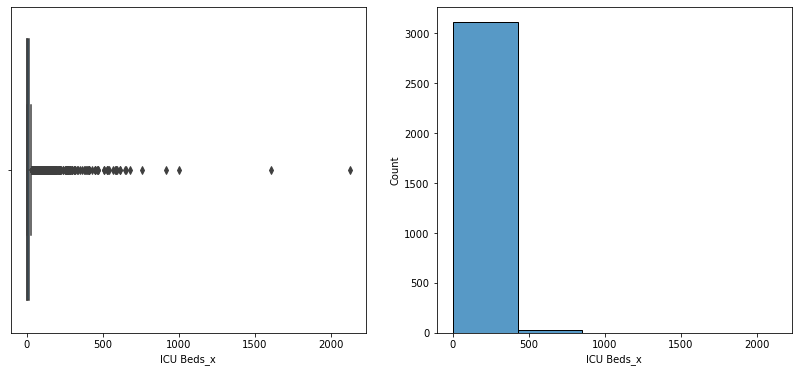

In [12]:
#Look for outliers  in ICU Beds feature
outliers('ICU Beds_x')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


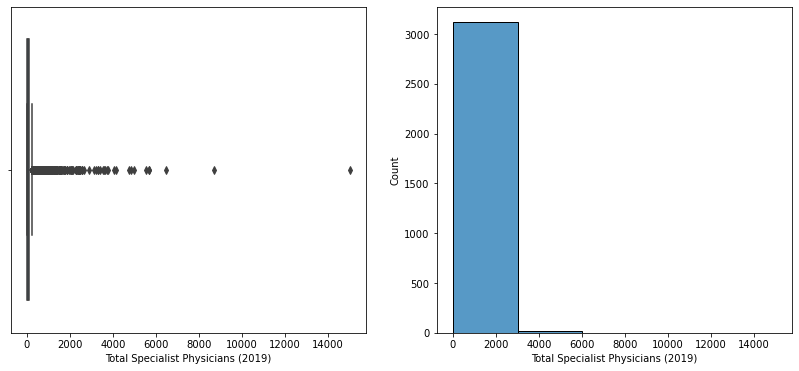

In [13]:
outliers('Total Specialist Physicians (2019)')

**Density plots**


In [14]:
#for eda

def kde_plot(dataframe, variable, upper=None, lower=None, bw=0.1):
    '''Plots a density plot for a variable with optional upper and lower bounds on the data (inclusive)'''
    
    plot_data = dataframe [variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]
        
    sns.kdeplot(plot_data, bw=bw)
    
    plt.savefig(os.path.join(PROJ_ROOT, "reports", "figures","{}.png".format(variable)))
    plt.show()


c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


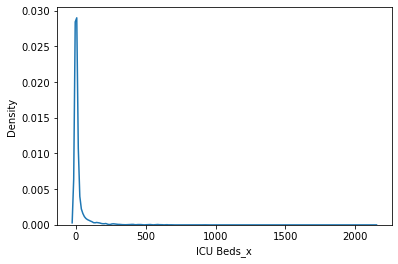

In [15]:
kde_plot(df, 'ICU Beds_x')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


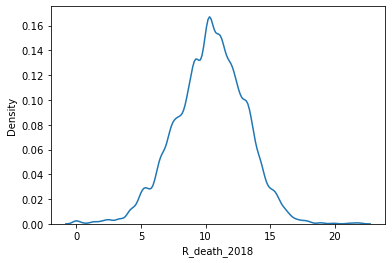

In [12]:
kde_plot(df, 'R_death_2018')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


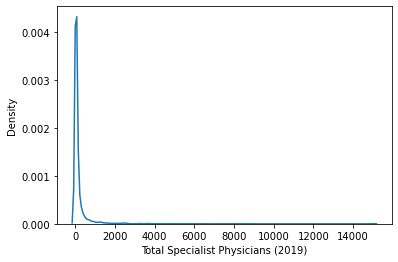

In [22]:
kde_plot(df, 'Total Specialist Physicians (2019)')

**Obtain the feature matrix**

In [16]:
#first, we will create a dataframe with the names for each fips code, then drop our county_names columns from main df, 
# and we will set our fips code as index

names_df = df[['fips', 'COUNTY_NAME']]
df.drop('COUNTY_NAME', axis=1, inplace=True)

In [17]:
df.set_index('fips')

,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
fips,,,,,,,,,,,,,,,,,,,,,
1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,...,55036,10523,42438,20181,15193,3345,3644,5462,1326,3
1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,...,203360,53519,170912,68790,50761,13414,14692,20520,5479,4
1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,...,26201,6150,19689,11325,8013,2159,2373,3870,887,6
1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,...,22580,4773,17813,9190,6894,1533,1789,2511,595,2
1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,...,57667,13600,44448,20584,15112,4101,4661,6017,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,43051,6104,6326,5359,6577,5334,5261,4943,2198,949,...,44527,7015,31761,12796,10672,1862,2098,2834,821,5
56039,23081,2384,2185,2967,4093,3423,2928,2875,1569,657,...,22923,4298,18842,4576,3655,981,928,1360,447,5
56041,20299,3121,3205,2153,2702,2390,2434,2554,1233,507,...,20758,3554,14455,6101,4944,1034,1163,1500,430,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 71 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   fips                                                                           3140 non-null   int64  
 1   TOT_POP                                                                        3140 non-null   int64  
 2   0-9                                                                            3140 non-null   int64  
 3   10-19                                                                          3140 non-null   int64  
 4   20-29                                                                          3140 non-null   int64  
 5   30-39                                                                          3140 non-null   int64  
 6   40-49                   

In [17]:
df.columns


Index(['fips', 'TOT_POP', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80+', 'White-alone pop', 'Black-alone pop',
       'Native American/American Indian-alone pop', 'Asian-alone pop',
       'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop',
       'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
       'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018',
       'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018',
       'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'POVALL_2018'

# Milestone II: Modeling

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import statistics
import numpy as np

In [27]:
features = ['TOT_POP',"Some college or associate's degree 2014-18","Bachelor's degree or higher 2014-18",'Civilian_labor_force_2018', 
            'Employed_2018','Unemployed_2018', 'Median_Household_Income_2018','Total Population','Population Aged 60+','80+',
            'county_pop2018_18 and older','anycondition_number', 'Obesity_number','Heart disease_number','COPD_number', 'diabetes_number',
            'CKD_number', 'Urban_rural_code']

outcome=['ICU Beds_x','Total Specialist Physicians (2019)','Active Physicians per 100000 Population 2018 (AAMC)']


In [ ]:
#Scale features

In [30]:
X = df[features]

In [34]:
alpha_list=[0.01,0.1,0.8,1,10]

for a in alpha_list:  

  # define model
  model = Lasso(alpha=a)

  # define model evaluation method
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

  # define a list of list
  var_left=[]

  for Z in outcome:

  # in loop 1 Z = ICU Beds_x
    y=df.loc[:, df.columns == Z].values

    model.fit(X,y)
    scores1 = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

    coef_list=abs(model.coef_)
    
    # count how many non-zero
    np.count_nonzero(coef_list)

    # know the location of non-zero coefficients
    loc=np.where(coef_list == max(abs(coef_list)))[0][0]

    # print the name of variables with non-zero coefficents
    var_left.append(features[loc])


c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+06, tolerance: 2.247e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+07, tolerance: 9.257e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

In [36]:
alpha_list=[0.01,0.1,0.8,1,10]
num_var_left=[]

for a in alpha_list:  

  # define model
  model = Lasso(alpha=a)

  # define model evaluation method
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

  # define a list of list 

  for Z in outcome:

  # in loop 1 Z = ICU Beds_x
    y=df.loc[:, df.columns == Z].values

    model.fit(X,y)
    scores1 = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

    coef_list=abs(model.coef_)
    
    # count how many non-zero
    np.count_nonzero(coef_list)
    
    # store 
    num_var_left.append(np.count_nonzero(coef_list))

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+06, tolerance: 2.247e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+07, tolerance: 9.257e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 



1. LASSO Regression

In [81]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
lasso = Lasso(alpha=1.0)

In [83]:
lasso.fit(X_train, y_train)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.178e+05, tolerance: 1.866e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [84]:
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.8267594402278158, 0.9245026531386185)

In [85]:
lasso.coef_

array([ 2.47724843e-05,  1.64254291e-04, -1.03205667e-03, -6.13337194e-05,
        1.26109214e-03,  2.12480364e-04, -1.07841790e-03,  1.53094395e-03,
       -3.69838677e-04, -3.95743749e-03,  6.28836564e-03, -1.10071807e-04,
        1.27137389e-04, -5.94469528e-05, -6.02257692e-04, -2.06555463e-03,
        1.23593172e-03,  1.31806873e-05,  3.52552709e-04,  1.45098060e-03,
        6.02413129e-01, -0.00000000e+00,  9.63639923e-03, -0.00000000e+00,
       -0.00000000e+00, -5.85313701e-03,  1.23771437e-04, -7.05131394e-05,
        2.95171949e-04,  8.25560691e-04,  0.00000000e+00, -1.35182680e-01,
        8.71171361e-03, -1.88303017e-02,  4.56557596e-04, -8.90975053e-01,
        3.41619462e-01,  2.47727651e-01, -5.78953130e-04, -3.50786415e-04,
        6.36624063e-04, -1.80040107e-04, -2.31441870e-06,  1.22997002e-03,
       -0.00000000e+00,  2.02666357e-04, -7.26885813e-02, -0.00000000e+00,
        0.00000000e+00,  5.28268377e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [86]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [87]:
lasso_cv = LassoCV(cv=5)

In [88]:
lasso_cv.fit(X, y)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2460.9505458106287, tolerance: 1968.6369407245209
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5181.660808418877, tolerance: 1963.4263552547768
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

LassoCV(cv=5)

In [89]:
lasso_cv.score(X, y)

0.8573844506628032

In [90]:
lasso_cv.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.10995149e-04, -0.00000000e+00, -1.95519794e-04, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -